<a href="https://colab.research.google.com/github/marybello/neural-networks/blob/master/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [13]:
fashion = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion.load_data()

In [14]:
train_images.shape

(60000, 28, 28)

In [15]:
train_images[0,23,23]

194

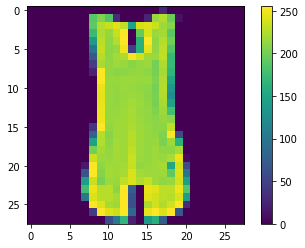

In [16]:
class_names = ['T-shirts/top', 'Trouser', 'Pullover','Dress', 'Coat', 'Sandal', 'Shirt','Sneaker',
               'Bag', 'Ankle boat']
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.show()               

In [17]:
train_images = train_images/255
test_images = test_images/255

In [8]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10,activation='softmax')
]
)

In [18]:
#compiling the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
#training the model
model.fit(train_images, train_labels, epochs=1)


1875/1875 [==============================] - 4s 2ms/step - loss: 0.1466 - accuracy: 0.9437


In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('test_accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.8899
test_accuracy: 0.8899000287055969


In [26]:
predictions = model.predict(test_images)

Sandal


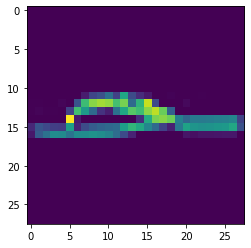

In [33]:
print(class_names[np.argmax(predictions[8])])
plt.figure()
plt.imshow(test_images[8])
plt.colorbar
plt.show()

pick a number: 8


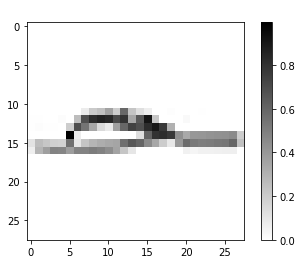

In [38]:
color = 'white'
plt.rcParams['text.color'] = color
plt.rcParams['axes.labelcolor'] = color

def predict(model,image,correct_label):
  class_names = ['T-shirts/top', 'Trouser', 'Pullover','Dress', 'Coat', 'Sandal', 'Shirt','Sneaker',
               'Bag', 'Ankle boat']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  show_image(image, class_names[correct_label],predicted_class)

def show_image(img,label,guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title('Expected' + label)
    plt.xlabel('Guess' + guess)
    plt.colorbar()
    plt.show()

def get_number():
  while True:
    num= input('pick a number: ')
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num) 
    else:
      print('please try again')
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model,image,label) 

